In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

In [34]:
df = pd.read_csv('04cars-fixed.csv')
df.head()

,Make,Brand,Country,Sports,SUV,Wagon,Minivan,Pickup,AWD,RWD,...,HighwayMPG,Dealer,Engine,Cylinders,Horsepower,CityMPG,Weight,Wheelbase,Length,Width
0,Acura 3.5 RL,Acura,Japan,0,0,0,0,0,0,0,...,24,39014,3.5,6,225,18,3880,115,197,72
1,Acura 3.5 RL Navigation,Acura,Japan,0,0,0,0,0,0,0,...,24,41100,3.5,6,225,18,3893,115,197,72
2,Acura MDX,Acura,Japan,0,1,0,0,0,1,0,...,23,33337,3.5,6,265,17,4451,106,189,77
3,Acura NSX S,Acura,Japan,1,0,0,0,0,0,1,...,24,79978,3.2,6,290,17,3153,100,174,71
4,Acura RSX,Acura,Japan,0,0,0,0,0,0,0,...,31,21761,2.0,4,200,24,2778,101,172,68


In [35]:
label = df.loc[:, ['Brand', 'Country']]
X = df.iloc[:,9:]
cols = list(X.columns)

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RWD         387 non-null    int64  
 1   Retail      387 non-null    int64  
 2   HighwayMPG  387 non-null    int64  
 3   Dealer      387 non-null    int64  
 4   Engine      387 non-null    float64
 5   Cylinders   387 non-null    int64  
 6   Horsepower  387 non-null    int64  
 7   CityMPG     387 non-null    int64  
 8   Weight      387 non-null    int64  
 9   Wheelbase   387 non-null    int64  
 10  Length      387 non-null    int64  
 11  Width       387 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 36.4 KB


In [37]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xs = ss.fit_transform(X)
Xs = pd.DataFrame(Xs, columns=cols)

In [38]:
pca = PCA()
pca.fit(Xs)

PCA()

In [39]:
pca.explained_variance_

array([7.23172402e+00, 2.11860395e+00, 8.99804162e-01, 6.57179049e-01,
       3.42095796e-01, 2.66998522e-01, 1.95355621e-01, 1.40755499e-01,
       7.71549730e-02, 6.36365798e-02, 3.69878612e-02, 7.92055104e-04])

Number of vriables being considered is 11 and hence it got 11 Components. Since the variables are standardised, the variance of each variables is 1. 

the above result shows that eigenvalue of PC1 is 7.12 (out of total 11). Hence, proportion of variation accounted by PC1 is 7.12/11.

Similarly we notice that eigenvalue of PC2 is 1.88 (out of 11). Hence, proportion of variation accounted by PC1 is (1.88/11). 

We notice that eigenvalue of PC3 and higher is less than 1. It means that these components are not accounting for the variation of even 1 variable. Hence, we may not consider these.

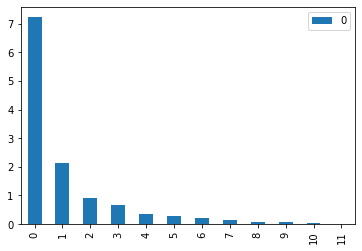

In [40]:
pd.DataFrame(pca.explained_variance_).plot.bar()
plt.show()

In [41]:
pca.explained_variance_ratio_

array([6.01086449e-01, 1.76094127e-01, 7.47899239e-02, 5.46234093e-02,
       2.84343189e-02, 2.21923836e-02, 1.62375689e-02, 1.16993158e-02,
       6.41296718e-03, 5.28934535e-03, 3.07435711e-03, 6.58340375e-05])

In [42]:
np.cumsum(pca.explained_variance_ratio_)

array([0.60108645, 0.77718058, 0.8519705 , 0.90659391, 0.93502823,
       0.95722061, 0.97345818, 0.9851575 , 0.99157046, 0.99685981,
       0.99993417, 1.        ])

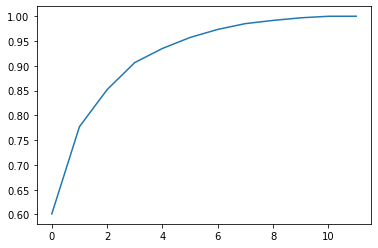

In [43]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [44]:
pca = PCA(n_components=3)
pca.fit(Xs)

PCA(n_components=3)

In [45]:
pd.DataFrame(pca.components_.T, index=cols, columns=['PC1', 'PC2', 'PC3'])

,PC1,PC2,PC3
RWD,-0.131538,0.395592,0.384310
Retail,-0.267714,0.415259,0.100935
HighwayMPG,0.302509,0.032538,0.559770
Dealer,-0.266322,0.416931,0.102662
Engine,-0.344568,-0.027316,0.052994
Cylinders,-0.333922,0.069340,0.089994
Horsepower,-0.319930,0.251063,-0.002012
CityMPG,0.307069,0.030329,0.482183
Weight,-0.328999,-0.200038,-0.139041
Wheelbase,-0.259492,-0.385901,0.318369


In [46]:
x_pc = pca.fit_transform(Xs)

In [47]:
x_pc.shape

(387, 3)

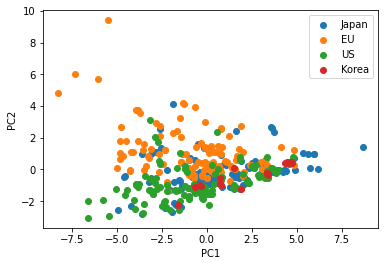

In [48]:
fig, ax = plt.subplots()
group = label['Country']
for g in list(group.unique()):
    i = np.where(group==g)
    ax.scatter(x_pc[i,0], x_pc[i,1], label=g)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend()
plt.show()

In [49]:
x_pc= pd.DataFrame(x_pc, columns=['PC1', 'PC2', 'PC3'])

In [50]:
#x_pc.to_csv('x_pc.csv')

### Factor Analysis

In [62]:
import pandas as pd
from sklearn.datasets import load_iris
#from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [63]:
label = df.loc[:, ['Brand', 'Country']]
X = df.iloc[:,9:]
cols = list(X.columns)

In [67]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xs = ss.fit_transform(X)
Xs = pd.DataFrame(Xs, columns=cols)

In [68]:
factor = FactorAnalyzer()

In [69]:
factor = FactorAnalyzer(rotation = 'Varimax')
factor.fit(Xs)
# Check Eigenvalues
factor.get_communalities()

array([0.26972154, 0.94151721, 1.00831787, 0.93726916, 0.84018721,
       0.78512057, 0.85339486, 0.84902393, 0.84820682, 0.84897397,
       0.81583852, 0.75501983])

In [70]:
factor.loadings_

array([[-0.00972785,  0.51559352,  0.06156483],
       [ 0.12726681,  0.94172462,  0.19615072],
       [-0.28678581, -0.25630916, -0.9275653 ],
       [ 0.12433151,  0.94049142,  0.19309771],
       [ 0.62079081,  0.50340348,  0.44876599],
       [ 0.52348291,  0.58897365,  0.40521136],
       [ 0.31793921,  0.76999679,  0.3992674 ],
       [-0.34868425, -0.30246392, -0.79747025],
       [ 0.68642731,  0.26286161,  0.55491273],
       [ 0.90139439,  0.05016625,  0.18424298],
       [ 0.89197113,  0.06255345,  0.12772268],
       [ 0.78052297,  0.14653955,  0.35260443]])

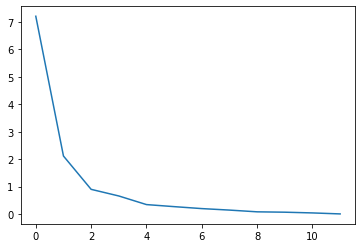

In [102]:
ev, _ = factor.get_eigenvalues()
plt.plot(ev)
plt.show()

In [78]:
fa = pd.DataFrame(factor.loadings_, index=X.columns)
fa.columns=['factor1','factor2', 'factor3']
fa

,factor1,factor2,factor3
RWD,-0.009728,0.515594,0.061565
Retail,0.127267,0.941725,0.196151
HighwayMPG,-0.286786,-0.256309,-0.927565
Dealer,0.124332,0.940491,0.193098
Engine,0.620791,0.503403,0.448766
Cylinders,0.523483,0.588974,0.405211
Horsepower,0.317939,0.769997,0.399267
CityMPG,-0.348684,-0.302464,-0.797470
Weight,0.686427,0.262862,0.554913
Wheelbase,0.901394,0.050166,0.184243


In [79]:
x_fa = factor.fit_transform(Xs)

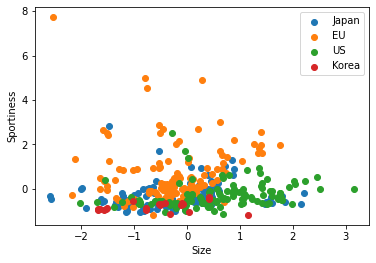

In [101]:
fig, ax = plt.subplots()
group = label['Country']
for g in list(group.unique()):
    i = np.where(group==g)
    ax.scatter(x_fa[i,0], x_fa[i,1], label=g)

ax.set_xlabel('Size')
ax.set_ylabel('Sportiness')
ax.legend()
plt.show()